# Capstone project: The battle for neighborhoods (week 2)

## Introduction/Business Problem

### Context:

Mrs Suzanne is a business woman having a series of restaurants in the United States. She of recent decided to extend her business to France and decided to open a restaurant in Paris. Given she has never done such a business in Paris, she came to us asking us to tell her if Paris could be a good destination for her business. If yes, where in Paris should she open the restaurant?

### Problem: 

Using foursquare datasets to help choose the best location to start a business.

### Problem background:

The amount of data collected every day can be highly useful when it comes to taking decisions. Whether we want to segment the neighborhoods of Toronto or New York City or we want to choose a location suitable for a restaurant in the city of Paris. Foursquare has built an important dataset on the neighborhoods and their venues. Exploring some of the neighborhoods and analyzing some of their trending venues can permit us get some important information that can help us in the process of selecting a place to start a restaurant in a city.

### Target Audience:

Business men who are looking for a new place to start either a new business or an existing one

## Data Description

Foursquare has an important quantity of data on the neighborhoods for a good number of cities world wide.  We intend to explore the city of Paris over a radius of 60km, Get all of its trending restaurants and evaluate their ratings and their foot traffics (statistics). We then intent to do some neighborhood segmentation on the data and try to analyze the results. We will recommend to Mrs. Suzanne the neighborhood with the highest foot traffic to the restaurant, and probably the highest density in restaurants. We will adopt the following methodology:
-	Data importation from foursquare
-	Data cleansing
-	Data transformation
-	Data analysis
-	Result presentation.

### Foursquare Data presentation

Foursquare has a series of variables for each venue amongts which the following.
- id : the Id of the venue
- name: the name of the venue
- location: the location of the venue which is a composite variable and contsins,
    * address
    * crossStreet
    * lat
    * lng
    * cc
    * city
    * state
    * country
    * Postal codes
- categories: the category of the venue, which is also a composite variable.
    * id
    * name
    * vpluralName
    * shortName
    * icon

For each venue, we will get the statistics. The fields are the following
- totalCheckins:	Number of total checkins at the venue during the time period.
- newCheckins:	Number of new visitors to the venue during the time period.
- uniqueVisitors:	Number of unique visitors at the venue during the time period.
- sharing:	A subobject containing fields twitter and facebook indicating the number of check-ins at the venue pushed to twitter and facebook.
- genderBreakdown:	A subobject containing fields female and male indicating the number of checkins at the venue by men and women.
- ageBreakdown:	An array of subobjects with fields age and checkins indicating the number of check-ins at the venue by people of different age ranges.
- hourBreakdown:	A 24-element array of subobjects with fields hour and checkins indicating the number of checkins at the venue during each hour of the day.
- visitCountHistogram:	A list of subobjects with fields checkins and users indicating how many users checked in a given number of times.
- topVisitors:	An array of the top 10 users by check-in count during the time period. Array elements are objects with fields user, and checkins, the number of checkins by - that user. Does not include users who have opted out of sharing their check-ins with venue managers in their settings.
- recentVisitors:	An array of the 10 most recent users. Array elements are objects with fields user and lastCheckin, the timestamp of the user’s last check-in. This field is only present if startAt is specified and endAt is NOT specified (i.e., now). Does not include users who have opted out of sharing their check-ins with venue managers in their settings.   


### Foursquare Data example

####  Import necessary Libraries

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  25.58 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  34.98 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  48.97 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.13 MB/s
vincent-0.4.4- 100% |###################

#### Foursquare Identification credentials

In [2]:
CLIENT_ID = 'RLOERECTSIUQXXJJGZGB1FQGVBCMMR1KJIZWHGF2ATNR5KTW' # your Foursquare ID
CLIENT_SECRET = 'MOSKWWH3L40MNHJE01NXTAFSZXW2KEYD4HP2PU31NYM0YRVW' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100000
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RLOERECTSIUQXXJJGZGB1FQGVBCMMR1KJIZWHGF2ATNR5KTW
CLIENT_SECRET:MOSKWWH3L40MNHJE01NXTAFSZXW2KEYD4HP2PU31NYM0YRVW


In [3]:
latitude = 48.866667
search_query = 'Restaurant'
radius = 60000
print(search_query + ' .... OK!')
longitude = 2.333333
print(latitude, longitude)

Restaurant .... OK!
48.866667 2.333333


#### Exploring Paris in a radius of 60km and geting it venues restaurants

In [4]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=RLOERECTSIUQXXJJGZGB1FQGVBCMMR1KJIZWHGF2ATNR5KTW&client_secret=MOSKWWH3L40MNHJE01NXTAFSZXW2KEYD4HP2PU31NYM0YRVW&ll=48.866667,2.333333&v=20180604&query=Restaurant&radius=60000&limit=100000'

In [5]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c585f7add5797192a398377'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d10c941735',
      'name': 'French Restaurant',
      'pluralName': 'French Restaurants',
      'primary': True,
      'shortName': 'French'}],
    'hasPerk': False,
    'id': '4e078807e4cdefcff6dce4f6',
    'location': {'address': 'Tour Eiffel',
     'cc': 'FR',
     'city': 'Paris',
     'country': 'France',
     'crossStreet': '1er étage',
     'distance': 3007,
     'formattedAddress': ['Tour Eiffel (1er étage)', '75007 Paris', 'France'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 48.858365824021554,
       'lng': 2.294248938560486}],
     'lat': 48.858365824021554,
     'lng': 2.294248938560486,
     'postalCode': '75007',
     'state': 'Île-de-France'},
    'name': 'Restaurant 58 Tour Eiffel',
    'referralId': 'v-1549295482'},
   {'c

In [6]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'pluralName': 'French Restaurants', 'icon': ...",False,4e078807e4cdefcff6dce4f6,Tour Eiffel,FR,Paris,France,1er étage,3007,"[Tour Eiffel (1er étage), 75007 Paris, France]","[{'label': 'display', 'lat': 48.85836582402155...",48.858366,2.294249,NaN,75007,Île-de-France,Restaurant 58 Tour Eiffel,v-1549295482,NaN
1,"[{'pluralName': 'French Restaurants', 'icon': ...",False,4cbb05054352a1cd0d4396f5,Musée d'Orsay,FR,Paris,France,1 rue de la Légion d'Honneur,916,"[Musée d'Orsay (1 rue de la Légion d'Honneur),...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,Le Restaurant du Musée d'Orsay,v-1549295482,NaN
2,"[{'pluralName': 'French Restaurants', 'icon': ...",False,4adcda13f964a520e53621e3,228 rue de Rivoli,FR,Paris,France,NaN,420,"[228 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86516, 'lng': ...",48.865160,2.328070,NaN,75001,Île-de-France,Restaurant Le Meurice Alain Ducasse,v-1549295482,NaN
3,"[{'pluralName': 'French Restaurants', 'icon': ...",False,52cf091111d2d9bb920d6122,Hôtel Costes,FR,Paris,France,239 rue Saint-Honoré,398,"[Hôtel Costes (239 rue Saint-Honoré), Paris, F...","[{'label': 'display', 'lat': 48.86669789450374...",48.866698,2.327894,NaN,NaN,Île-de-France,Restaurant Costes Saint-Honoré,v-1549295482,NaN
4,"[{'pluralName': 'Cafeterias', 'icon': {'suffix...",False,4e57797d7d8bf55c172826d9,NaN,FR,Paris,France,NaN,142,"[75002 Paris, France]","[{'label': 'display', 'lat': 48.86791550563465...",48.867916,2.333772,NaN,75002,Île-de-France,Restaurant d'Entreprise,v-1549295482,NaN


### Paris Neigborhood data processing

In [7]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Restaurant 58 Tour Eiffel,French Restaurant,Tour Eiffel,FR,Paris,France,1er étage,3007,"[Tour Eiffel (1er étage), 75007 Paris, France]","[{'label': 'display', 'lat': 48.85836582402155...",48.858366,2.294249,NaN,75007,Île-de-France,4e078807e4cdefcff6dce4f6
1,Le Restaurant du Musée d'Orsay,French Restaurant,Musée d'Orsay,FR,Paris,France,1 rue de la Légion d'Honneur,916,"[Musée d'Orsay (1 rue de la Légion d'Honneur),...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,4cbb05054352a1cd0d4396f5
2,Restaurant Le Meurice Alain Ducasse,French Restaurant,228 rue de Rivoli,FR,Paris,France,NaN,420,"[228 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86516, 'lng': ...",48.865160,2.328070,NaN,75001,Île-de-France,4adcda13f964a520e53621e3
3,Restaurant Costes Saint-Honoré,French Restaurant,Hôtel Costes,FR,Paris,France,239 rue Saint-Honoré,398,"[Hôtel Costes (239 rue Saint-Honoré), Paris, F...","[{'label': 'display', 'lat': 48.86669789450374...",48.866698,2.327894,NaN,NaN,Île-de-France,52cf091111d2d9bb920d6122
4,Restaurant d'Entreprise,Cafeteria,NaN,FR,Paris,France,NaN,142,"[75002 Paris, France]","[{'label': 'display', 'lat': 48.86791550563465...",48.867916,2.333772,NaN,75002,Île-de-France,4e57797d7d8bf55c172826d9


Let's visualize the restaurants that are nearby in a radius of 60km

In [8]:
dataframe_filtered.name

0                     Restaurant 58 Tour Eiffel
1                Le Restaurant du Musée d'Orsay
2           Restaurant Le Meurice Alain Ducasse
3                Restaurant Costes Saint-Honoré
4                       Restaurant d'Entreprise
5                        Restaurant Mon Paris !
6                             Restaurant Coréen
7                            L'Opéra Restaurant
8                       Restaurant Le Mona Lisa
9            Restaurant Aux Tours de Notre-Dame
10                           Restaurant Sichuan
11                    Le Grand Amour Restaurant
12                           Jet Set Restaurant
13                         Restaurant Ayào.阿耀面点
14                                Le Restaurant
15                     Le Restaurant de L'Hôtel
16                             Restaurant Au 35
17                         Restaurant Champeaux
18                 Restaurant Vietnam | Banh Mi
19                     Restaurant Alain Ducasse
20                     Le Restaurant des

In [9]:

dff=dataframe_filtered.dropna(subset=["postalCode"])
dff.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Restaurant 58 Tour Eiffel,French Restaurant,Tour Eiffel,FR,Paris,France,1er étage,3007,"[Tour Eiffel (1er étage), 75007 Paris, France]","[{'label': 'display', 'lat': 48.85836582402155...",48.858366,2.294249,NaN,75007,Île-de-France,4e078807e4cdefcff6dce4f6
1,Le Restaurant du Musée d'Orsay,French Restaurant,Musée d'Orsay,FR,Paris,France,1 rue de la Légion d'Honneur,916,"[Musée d'Orsay (1 rue de la Légion d'Honneur),...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,4cbb05054352a1cd0d4396f5
2,Restaurant Le Meurice Alain Ducasse,French Restaurant,228 rue de Rivoli,FR,Paris,France,NaN,420,"[228 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86516, 'lng': ...",48.865160,2.328070,NaN,75001,Île-de-France,4adcda13f964a520e53621e3
4,Restaurant d'Entreprise,Cafeteria,NaN,FR,Paris,France,NaN,142,"[75002 Paris, France]","[{'label': 'display', 'lat': 48.86791550563465...",48.867916,2.333772,NaN,75002,Île-de-France,4e57797d7d8bf55c172826d9
5,Restaurant Mon Paris !,French Restaurant,6 rue Édouard VII,FR,Paris,France,NaN,555,"[6 rue Édouard VII, 75009 Paris, France]","[{'label': 'display', 'lat': 48.870959, 'lng':...",48.870959,2.329453,NaN,75009,Île-de-France,5640db04cd10809c53939c69


In [10]:
dff.dtypes

name                 object
categories           object
address              object
cc                   object
city                 object
country              object
crossStreet          object
distance              int64
formattedAddress     object
labeledLatLngs       object
lat                 float64
lng                 float64
neighborhood         object
postalCode           object
state                object
id                   object
dtype: object

#### Laoding the names of the Paris Neighborhoods

In [12]:
# The code was removed by Watson Studio for sharing.

,postalCode,Neighbourhood,Neighbourhood_name
0,75001,1er arrondissement de paris,Louvre
1,75002,2eme arrondissement de paris,Bourse
2,75003,3eme arrondissement de paris,Temple
3,75004,4eme arrondissement de paris,Hotel-de-Ville
4,75005,5eme arrondissement de paris,Pantheon


#### Merging the Neighborhoods with the Foursquare data on Paris

In [13]:
dff["postalCode"] = pd.to_numeric(dff["postalCode"])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
data =pd.merge(dff, df_data_1, on='postalCode', how='left')
data

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Neighbourhood,Neighbourhood_name
0,Restaurant 58 Tour Eiffel,French Restaurant,Tour Eiffel,FR,Paris,France,1er étage,3007,"[Tour Eiffel (1er étage), 75007 Paris, France]","[{'label': 'display', 'lat': 48.85836582402155...",48.858366,2.294249,NaN,75007,Île-de-France,4e078807e4cdefcff6dce4f6,7eme arrondissement de paris,Palais-Bourbon
1,Le Restaurant du Musée d'Orsay,French Restaurant,Musée d'Orsay,FR,Paris,France,1 rue de la Légion d'Honneur,916,"[Musée d'Orsay (1 rue de la Légion d'Honneur),...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,4cbb05054352a1cd0d4396f5,7eme arrondissement de paris,Palais-Bourbon
2,Restaurant Le Meurice Alain Ducasse,French Restaurant,228 rue de Rivoli,FR,Paris,France,NaN,420,"[228 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86516, 'lng': ...",48.865160,2.328070,NaN,75001,Île-de-France,4adcda13f964a520e53621e3,1er arrondissement de paris,Louvre
3,Restaurant d'Entreprise,Cafeteria,NaN,FR,Paris,France,NaN,142,"[75002 Paris, France]","[{'label': 'display', 'lat': 48.86791550563465...",48.867916,2.333772,NaN,75002,Île-de-France,4e57797d7d8bf55c172826d9,2eme arrondissement de paris,Bourse
4,Restaurant Mon Paris !,French Restaurant,6 rue Édouard VII,FR,Paris,France,NaN,555,"[6 rue Édouard VII, 75009 Paris, France]","[{'label': 'display', 'lat': 48.870959, 'lng':...",48.870959,2.329453,NaN,75009,Île-de-France,5640db04cd10809c53939c69,9eme arrondissement de paris,Opera
5,L'Opéra Restaurant,French Restaurant,Palais Garnier,FR,Paris,France,Place Jacques Rouché,609,"[Palais Garnier (Place Jacques Rouché), 75009 ...","[{'label': 'display', 'lat': 48.87210620982531...",48.872106,2.332414,NaN,75009,Île-de-France,4e17241db3ad8e08699e5abe,9eme arrondissement de paris,Opera
6,Restaurant Le Mona Lisa,French Restaurant,47 rue Berger,FR,Paris,France,NaN,838,"[47 rue Berger, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86219809159731...",48.862198,2.342542,NaN,75001,Île-de-France,59ab059c86bc49021b313ca9,1er arrondissement de paris,Louvre
7,Restaurant Aux Tours de Notre-Dame,French Restaurant,23 rue d'Arcole,FR,Paris,France,NaN,1870,"[23 rue d'Arcole, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85362193008465...",48.853622,2.349421,NaN,75004,Île-de-France,50445ef7e4b0ba0a539ad83f,4eme arrondissement de paris,Hotel-de-Ville
8,Restaurant Sichuan,Szechuan Restaurant,17 rue Le Peletier,FR,Paris,France,NaN,775,"[17 rue Le Peletier, 75009 Paris, France]","[{'label': 'display', 'lat': 48.872789, 'lng':...",48.872789,2.338398,NaN,75009,Île-de-France,5a22aef7c8b2fb5c6278c5c2,9eme arrondissement de paris,Opera
9,Le Grand Amour Restaurant,Restaurant,18 rue de la Fidélité,FR,Paris,France,NaN,1899,"[18 rue de la Fidélité, 75010 Paris, France]","[{'label': 'display', 'lat': 48.87456598277865...",48.874566,2.356321,NaN,75010,Île-de-France,56507fbd498eec7fabc67121,10eme arrondissement de paris,Entrepot


#### Fetching for the ratings and the tips of each of the restaurants

In [15]:
from random import randrange, uniform
d = []
for i, row in enumerate(dff.id):
    venue_id = row
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    tip=result['response']['venue']['tips']['count']
    #tip= randrange(0, 2000)
    try:
        rat=result['response']['venue']['rating']
        #rat = uniform(0, 10)
    except:
        rat=0
    d.append({'tips': tip, 'rating': rat})

d=pd.DataFrame(d)

In [16]:
datat = pd.concat([data, d], axis=1, join_axes=[data.index])
datat

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,Neighbourhood,Neighbourhood_name,rating,tips
0,Restaurant 58 Tour Eiffel,French Restaurant,Tour Eiffel,FR,Paris,France,1er étage,3007,"[Tour Eiffel (1er étage), 75007 Paris, France]","[{'label': 'display', 'lat': 48.85836582402155...",48.858366,2.294249,NaN,75007,Île-de-France,4e078807e4cdefcff6dce4f6,7eme arrondissement de paris,Palais-Bourbon,9.2,154
1,Le Restaurant du Musée d'Orsay,French Restaurant,Musée d'Orsay,FR,Paris,France,1 rue de la Légion d'Honneur,916,"[Musée d'Orsay (1 rue de la Légion d'Honneur),...","[{'label': 'display', 'lat': 48.86029986248957...",48.860300,2.325392,NaN,75007,Île-de-France,4cbb05054352a1cd0d4396f5,7eme arrondissement de paris,Palais-Bourbon,7.2,16
2,Restaurant Le Meurice Alain Ducasse,French Restaurant,228 rue de Rivoli,FR,Paris,France,NaN,420,"[228 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86516, 'lng': ...",48.865160,2.328070,NaN,75001,Île-de-France,4adcda13f964a520e53621e3,1er arrondissement de paris,Louvre,8.5,37
3,Restaurant d'Entreprise,Cafeteria,NaN,FR,Paris,France,NaN,142,"[75002 Paris, France]","[{'label': 'display', 'lat': 48.86791550563465...",48.867916,2.333772,NaN,75002,Île-de-France,4e57797d7d8bf55c172826d9,2eme arrondissement de paris,Bourse,0.0,0
4,Restaurant Mon Paris !,French Restaurant,6 rue Édouard VII,FR,Paris,France,NaN,555,"[6 rue Édouard VII, 75009 Paris, France]","[{'label': 'display', 'lat': 48.870959, 'lng':...",48.870959,2.329453,NaN,75009,Île-de-France,5640db04cd10809c53939c69,9eme arrondissement de paris,Opera,7.6,9
5,L'Opéra Restaurant,French Restaurant,Palais Garnier,FR,Paris,France,Place Jacques Rouché,609,"[Palais Garnier (Place Jacques Rouché), 75009 ...","[{'label': 'display', 'lat': 48.87210620982531...",48.872106,2.332414,NaN,75009,Île-de-France,4e17241db3ad8e08699e5abe,9eme arrondissement de paris,Opera,7.5,48
6,Restaurant Le Mona Lisa,French Restaurant,47 rue Berger,FR,Paris,France,NaN,838,"[47 rue Berger, 75001 Paris, France]","[{'label': 'display', 'lat': 48.86219809159731...",48.862198,2.342542,NaN,75001,Île-de-France,59ab059c86bc49021b313ca9,1er arrondissement de paris,Louvre,0.0,0
7,Restaurant Aux Tours de Notre-Dame,French Restaurant,23 rue d'Arcole,FR,Paris,France,NaN,1870,"[23 rue d'Arcole, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85362193008465...",48.853622,2.349421,NaN,75004,Île-de-France,50445ef7e4b0ba0a539ad83f,4eme arrondissement de paris,Hotel-de-Ville,6.1,21
8,Restaurant Sichuan,Szechuan Restaurant,17 rue Le Peletier,FR,Paris,France,NaN,775,"[17 rue Le Peletier, 75009 Paris, France]","[{'label': 'display', 'lat': 48.872789, 'lng':...",48.872789,2.338398,NaN,75009,Île-de-France,5a22aef7c8b2fb5c6278c5c2,9eme arrondissement de paris,Opera,0.0,0
9,Le Grand Amour Restaurant,Restaurant,18 rue de la Fidélité,FR,Paris,France,NaN,1899,"[18 rue de la Fidélité, 75010 Paris, France]","[{'label': 'display', 'lat': 48.87456598277865...",48.874566,2.356321,NaN,75010,Île-de-France,56507fbd498eec7fabc67121,10eme arrondissement de paris,Entrepot,8.5,25


#### Looking at the number of restaurants per neighborhood

In [17]:
datat["Neighbourhood_name"].value_counts()

Elysee                 8
Opera                  7
Louvre                 7
Palais-Bourbon         5
Entrepot               5
Bourse                 3
Temple                 2
Luxembourg             2
Pantheon               2
Popincourt             1
Hotel-de-Ville         1
Buttes-Montmartre      1
Batignolles-Monceau    1
Observatoire           1
Name: Neighbourhood_name, dtype: int64

In [18]:
data2 = datat[['name','Neighbourhood_name','rating','tips']]
data2.head()

,name,Neighbourhood_name,rating,tips
0,Restaurant 58 Tour Eiffel,Palais-Bourbon,9.2,154
1,Le Restaurant du Musée d'Orsay,Palais-Bourbon,7.2,16
2,Restaurant Le Meurice Alain Ducasse,Louvre,8.5,37
3,Restaurant d'Entreprise,Bourse,0.0,0
4,Restaurant Mon Paris !,Opera,7.6,9


In [19]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.1.0


#### Visualizing a histogram of the number of tips per neighborhood

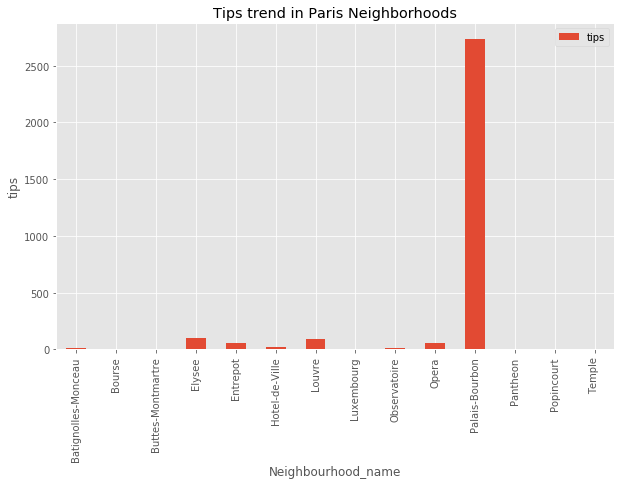

In [20]:
data_tips=data2.groupby('Neighbourhood_name').agg({'tips':'sum'})
# step 2: plot data
data_tips.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighbourhood_name') # add to x-label to the plot
plt.ylabel('tips') # add y-label to the plot
plt.title('Tips trend in Paris Neighborhoods') # add title to the plot

plt.show()

#### Visualizing a histogram of the ratings per neighborhood

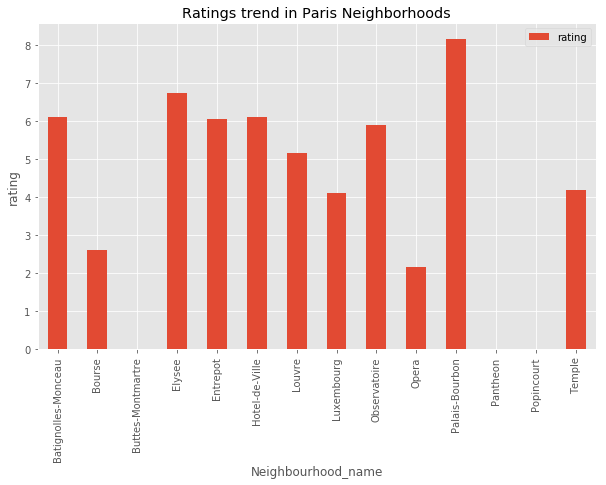

In [21]:
data_rating=data2.groupby('Neighbourhood_name').agg({'rating': 'mean'})
# step 2: plot data
data_rating.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighbourhood_name') # add to x-label to the plot
plt.ylabel('rating') # add y-label to the plot
plt.title('Ratings trend in Paris Neighborhoods') # add title to the plot

plt.show()

#### Evaluating the corrolation between ratings and tips

In [22]:
data2.corr()

,rating,tips
rating,1.000000,0.217715
tips,0.217715,1.000000


In [23]:
data2.describe()

,rating,tips
count,46.000000,46.000000
mean,4.754348,67.717391
std,3.763492,375.820800
min,0.000000,0.000000
25%,0.000000,0.000000
50%,6.700000,5.000000
75%,7.900000,16.000000
max,9.500000,2556.000000


In [24]:
data2.describe(include=['object'])

,name,Neighbourhood_name
count,46,46
unique,45,14
top,Le Restaurant de L'Hôtel,Elysee
freq,2,8


In [25]:
dummy=pd.get_dummies(data2['Neighbourhood_name'])

In [26]:
data2=pd.concat([data2,dummy],axis=1)
data2.head()

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple
0,Restaurant 58 Tour Eiffel,Palais-Bourbon,9.2,154,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Le Restaurant du Musée d'Orsay,Palais-Bourbon,7.2,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Restaurant Le Meurice Alain Ducasse,Louvre,8.5,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Restaurant d'Entreprise,Bourse,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Restaurant Mon Paris !,Opera,7.6,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
#del data2['Neighbourhood_name']
data2.head()

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple
0,Restaurant 58 Tour Eiffel,Palais-Bourbon,9.2,154,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,Le Restaurant du Musée d'Orsay,Palais-Bourbon,7.2,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Restaurant Le Meurice Alain Ducasse,Louvre,8.5,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Restaurant d'Entreprise,Bourse,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Restaurant Mon Paris !,Opera,7.6,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Evaluating corrolation between variables

In [28]:
data2.corr()

,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple
rating,1.000000,0.217715,0.053890,-0.152871,-0.190400,0.244451,0.120614,0.053890,0.047470,-0.037478,0.045881,-0.295600,0.319503,-0.272309,-0.190400,-0.031751
tips,0.217715,1.000000,-0.023147,-0.047172,-0.027157,-0.067541,-0.052721,-0.018735,-0.062364,-0.036546,-0.020741,-0.067737,0.450649,-0.038267,-0.027157,-0.037119
Batignolles-Monceau,0.053890,-0.023147,1.000000,-0.039375,-0.022222,-0.068399,-0.052058,-0.022222,-0.063155,-0.031782,-0.022222,-0.063155,-0.052058,-0.031782,-0.022222,-0.031782
Bourse,-0.152871,-0.047172,-0.039375,1.000000,-0.039375,-0.121194,-0.092240,-0.039375,-0.111903,-0.056314,-0.039375,-0.111903,-0.092240,-0.056314,-0.039375,-0.056314
Buttes-Montmartre,-0.190400,-0.027157,-0.022222,-0.039375,1.000000,-0.068399,-0.052058,-0.022222,-0.063155,-0.031782,-0.022222,-0.063155,-0.052058,-0.031782,-0.022222,-0.031782
Elysee,0.244451,-0.067541,-0.068399,-0.121194,-0.068399,1.000000,-0.160231,-0.068399,-0.194388,-0.097823,-0.068399,-0.194388,-0.160231,-0.097823,-0.068399,-0.097823
Entrepot,0.120614,-0.052721,-0.052058,-0.092240,-0.052058,-0.160231,1.000000,-0.052058,-0.147948,-0.074453,-0.052058,-0.147948,-0.121951,-0.074453,-0.052058,-0.074453
Hotel-de-Ville,0.053890,-0.018735,-0.022222,-0.039375,-0.022222,-0.068399,-0.052058,1.000000,-0.063155,-0.031782,-0.022222,-0.063155,-0.052058,-0.031782,-0.022222,-0.031782
Louvre,0.047470,-0.062364,-0.063155,-0.111903,-0.063155,-0.194388,-0.147948,-0.063155,1.000000,-0.090324,-0.063155,-0.179487,-0.147948,-0.090324,-0.063155,-0.090324
Luxembourg,-0.037478,-0.036546,-0.031782,-0.056314,-0.031782,-0.097823,-0.074453,-0.031782,-0.090324,1.000000,-0.031782,-0.090324,-0.074453,-0.045455,-0.031782,-0.045455


In [29]:
data3=data2.drop(columns=['name','Neighbourhood_name'])

#### Data Normalization using Min-Max

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(data3) 

In [31]:
#data4 = pd.DataFrame(scaled_values)

data3.loc[:,:] = scaled_values
data3.head()

,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple
0,0.968421,0.060250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.757895,0.006260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.894737,0.014476,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.800000,0.003521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Neighborhood Clustering using K-Means

In [33]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data3)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 1, 0, 3, 3, 1, 0, 3, 0], dtype=int32)

### Data Labeling

In [34]:


# add clustering labels
data2['Cluster Labels'] = kmeans.labels_

data2

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple,Cluster Labels
0,Restaurant 58 Tour Eiffel,Palais-Bourbon,9.2,154,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
1,Le Restaurant du Musée d'Orsay,Palais-Bourbon,7.2,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
2,Restaurant Le Meurice Alain Ducasse,Louvre,8.5,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,Restaurant d'Entreprise,Bourse,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Restaurant Mon Paris !,Opera,7.6,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
5,L'Opéra Restaurant,Opera,7.5,48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
6,Restaurant Le Mona Lisa,Louvre,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
7,Restaurant Aux Tours de Notre-Dame,Hotel-de-Ville,6.1,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,Restaurant Sichuan,Opera,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
9,Le Grand Amour Restaurant,Entrepot,8.5,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### Clusters seperation

#### Cluster No 1

In [35]:
data2.loc[data2['Cluster Labels'] == 0]

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple,Cluster Labels
3,Restaurant d'Entreprise,Bourse,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Restaurant Aux Tours de Notre-Dame,Hotel-de-Ville,6.1,21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,Le Grand Amour Restaurant,Entrepot,8.5,25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13,Le Restaurant de L'Hôtel,Luxembourg,8.2,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
18,Le Restaurant des Poètes,Temple,8.4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21,"Terrass"" Restaurant",Buttes-Montmartre,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
23,Restaurant Le Robinet d'Or,Entrepot,7.9,19,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
28,Elise Restaurant,Entrepot,7.1,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
29,Restaurant Buffet Monte Carlo,Batignolles-Monceau,6.1,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,Restaurant Hotel Little Palace,Temple,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Cluster No 2

In [36]:
data2.loc[data2['Cluster Labels'] == 1]

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple,Cluster Labels
2,Restaurant Le Meurice Alain Ducasse,Louvre,8.5,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
6,Restaurant Le Mona Lisa,Louvre,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
15,Restaurant Champeaux,Louvre,7.9,24,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
25,Restaurant de la Cordonnerie,Louvre,6.9,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
31,Restaurants du Monde,Louvre,5.6,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
40,Macéo Restaurant & Bar,Louvre,7.3,19,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
43,Restaurant du Théâtre,Louvre,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


#### Cluster No 3

In [37]:
data2.loc[data2['Cluster Labels'] == 2]

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple,Cluster Labels
10,Jet Set Restaurant,Elysee,6.6,41,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
12,Le Restaurant,Elysee,8.6,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
14,Restaurant Au 35,Elysee,7.1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
17,Restaurant Alain Ducasse,Elysee,8.9,31,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
20,Le Grand Restaurant - Jean-François Piège,Elysee,8.1,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
24,BLOSSOM Restaurant,Elysee,0.0,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
27,Restaurant & Lounge Bar Le W,Elysee,7.9,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
33,Restaurant du Rond-Point,Elysee,6.7,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


#### Cluster No 4

In [38]:
data2.loc[data2['Cluster Labels'] == 3]

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple,Cluster Labels
4,Restaurant Mon Paris !,Opera,7.6,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
5,L'Opéra Restaurant,Opera,7.5,48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
8,Restaurant Sichuan,Opera,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
11,Restaurant Ayào.阿耀面点,Opera,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
16,Restaurant Vietnam | Banh Mi,Opera,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
19,La Cantone - Restaurant d'Entreprise,Opera,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
41,B.B. Le Restaurant,Opera,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3


In [39]:
data2.loc[data2['Cluster Labels'] == 4]

,name,Neighbourhood_name,rating,tips,Batignolles-Monceau,Bourse,Buttes-Montmartre,Elysee,Entrepot,Hotel-de-Ville,Louvre,Luxembourg,Observatoire,Opera,Palais-Bourbon,Pantheon,Popincourt,Temple,Cluster Labels
0,Restaurant 58 Tour Eiffel,Palais-Bourbon,9.2,154,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
1,Le Restaurant du Musée d'Orsay,Palais-Bourbon,7.2,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
22,Restaurant du Montalembert,Palais-Bourbon,6.9,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
26,Le 144 - Restaurant Petrossian,Palais-Bourbon,8.0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
39,Tour Eiffel,Palais-Bourbon,9.5,2556,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
